In [1]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

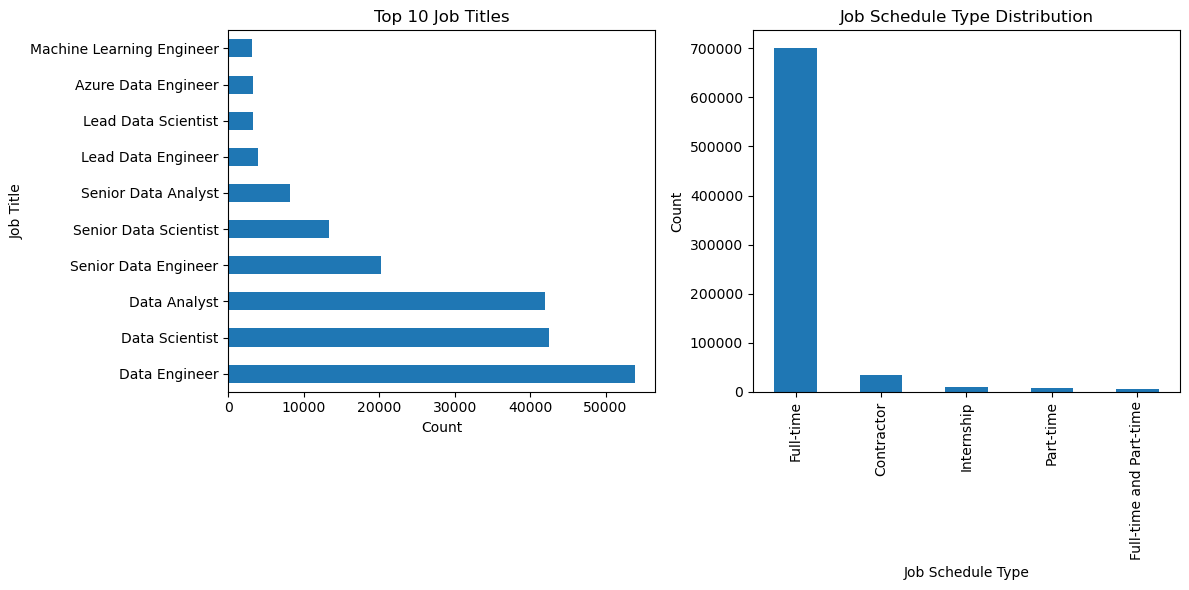

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12, 6))
df['job_title'].value_counts().head(10).plot(kind='barh', ax=ax[0])
df['job_schedule_type'].value_counts().head().plot(kind='bar', ax=ax[1])

ax[0].set_xlabel('Count')
ax[0].set_ylabel('Job Title')
ax[0].set_title('Top 10 Job Titles')
ax[1].set_xlabel('Job Schedule Type')
ax[1].set_ylabel('Count')
ax[1].set_title('Job Schedule Type Distribution')
plt.tight_layout()
plt.show()


## Count of Top Skills in Job Posting

In [96]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills').reset_index(drop=True)
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count',ascending=False, inplace=True)
df_skills_count


,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


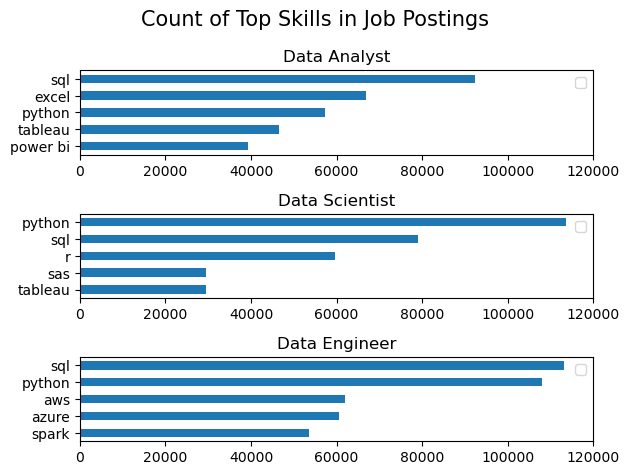

In [98]:
Job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
fig, ax = plt.subplots(3,1)
for i , Job_titles in enumerate(Job_titles):
  df_plot=df_skills_count[df_skills_count['job_title_short']==Job_titles].head()
  df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=Job_titles)
  ax[i].invert_yaxis()
  ax[i].set_ylabel("")
  ax[i].legend("")
  ax[i].set_xlim(0, 120000)

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

In [6]:
Job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
for i , Job_title in enumerate(Job_titles):
    print(i, Job_title)

0 Data Analyst
1 Data Scientist
2 Data Engineer
